In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
start = '2013-01-01'
end = '2023-12-21'

stock = 'GOOG'
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2013-01-02,17.949236,18.013729,18.107130,17.846855,17.918339,102033017
2013-01-03,17.959660,18.024191,18.229919,17.950716,18.055573,93075567
2013-01-04,18.314548,18.380356,18.467529,18.124067,18.165413,110954331
2013-01-07,18.234640,18.300158,18.415474,18.196297,18.317591,66476239
2013-01-08,18.198652,18.264042,18.338762,18.043119,18.319834,67295297
...,...,...,...,...,...,...
2023-12-14,132.723114,133.199997,135.035004,131.059998,134.770004,29619100
2023-12-15,133.360809,133.839996,134.830002,132.630005,132.919998,58569400


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2013-01-02,17.949236,18.013729,18.107130,17.846855,17.918339,102033017
1,2013-01-03,17.959660,18.024191,18.229919,17.950716,18.055573,93075567
2,2013-01-04,18.314548,18.380356,18.467529,18.124067,18.165413,110954331
3,2013-01-07,18.234640,18.300158,18.415474,18.196297,18.317591,66476239
4,2013-01-08,18.198652,18.264042,18.338762,18.043119,18.319834,67295297
...,...,...,...,...,...,...,...
2757,2023-12-14,132.723114,133.199997,135.035004,131.059998,134.770004,29619100
2758,2023-12-15,133.360809,133.839996,134.830002,132.630005,132.919998,58569400
2759,2023-12-18,136.698822,137.190002,138.380005,133.770004,133.860001,25699800


In [ ]:
ma_100_days = data.Close.rolling(100).mean()


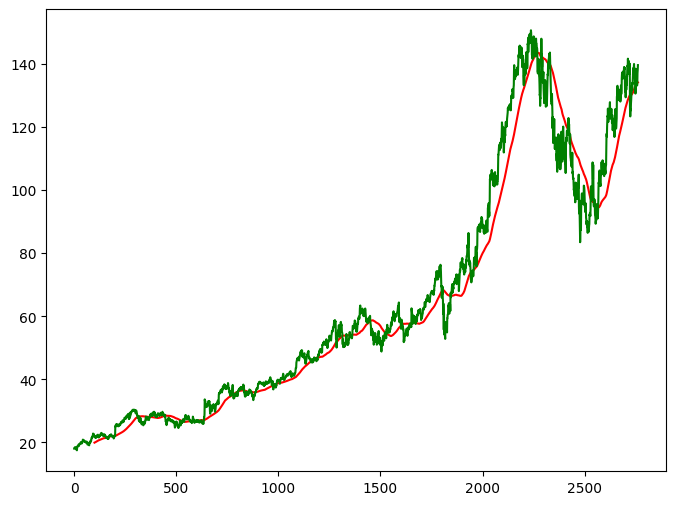

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

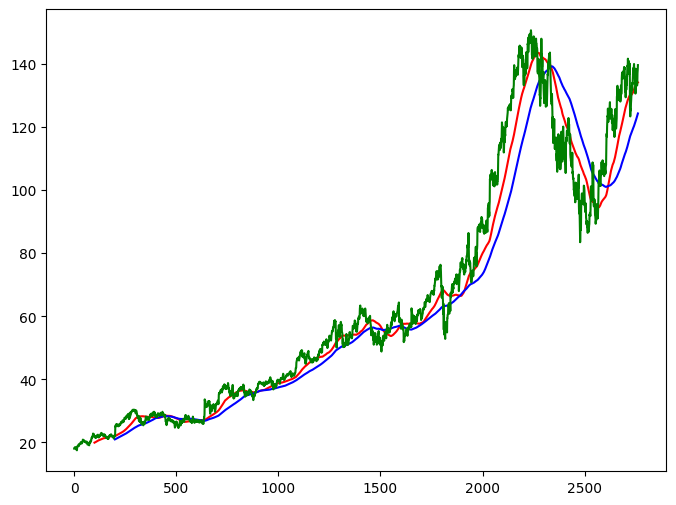

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [ ]:
data_train.shape[0]

2209

In [ ]:
data_test.shape[0]

553

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
del range  # Delete the variable 'range'



In [ ]:
from builtins import range

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):  # Use the built-in range function
    x.append(data_train_scale[i - 100:i])
    y.append(data_train_scale[i, 0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 307ms/step - loss: 0.0458
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 314ms/step - loss: 0.0041
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.0044
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - loss: 0.0038
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - loss: 0.0041
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 325ms/step - loss: 0.0029
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 329ms/step - loss: 0.0040
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0048
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 323ms/step - loss: 0.0025
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0032
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - loss: 0.0026
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 311ms/step - loss: 0.0028
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 298ms/step - loss: 0.0023
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - loss: 0.0023
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days= data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days,data_test], ignore_index=True)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):  # Use the built-in range function
    x.append(data_test_scale[i - 100:i])
    y.append(data_test_scale[i, 0])

x,y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step


In [ ]:
scale= 1/scaler.scale_

In [ ]:
y_predict= y_predict*scale

In [ ]:
y = y*scale

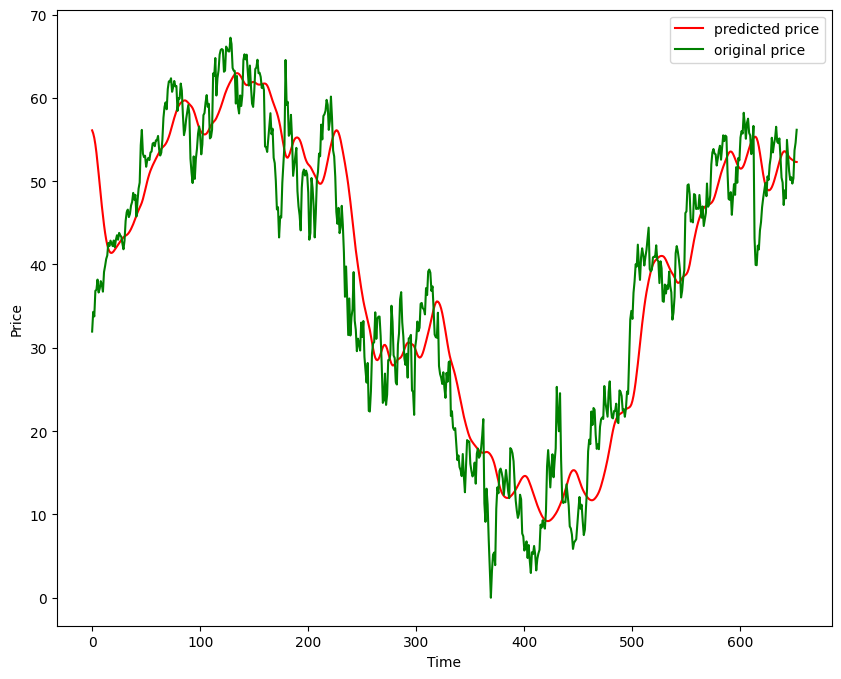

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r', label='predicted price')
plt.plot(y,'g',label='original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Prediction Model.keras')